<a href="https://colab.research.google.com/github/ugrasegehan/IE423/blob/main/Task9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

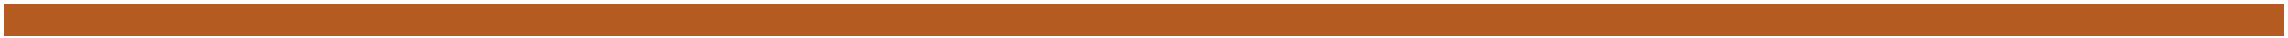

IE423
Task9

## Egehan Uğraş

## 22003278

## <font color='#475468'> Pretrained Models:</font>
### <font color='#475468'> Can you speed up your efforts using pretrained models?</font>

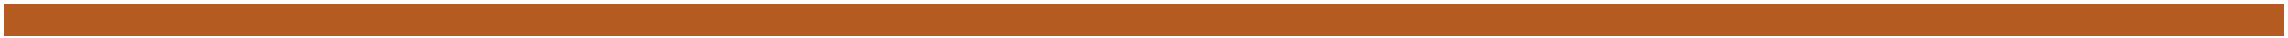

# Transfomers

Pretrained chains of models that perform specific tasks

## Initialize

In [13]:
!pip install transformers

In [14]:
# Use pipelines to access pre-trained models
from transformers import pipeline

## Sentiment Analysis

In [15]:
# Import the necessary pipeline from transformers
from transformers import pipeline

# Model
mdlSnt = pipeline('sentiment-analysis')

# Parameters - Inserted the provided example sentences
prmStatement = [
    "I just received the best news of my life, and I couldn't be happier!",
    "I'm extremely disappointed with the service I received; it was a complete letdown.",
    "The package arrived on time, as expected.",
    "The movie had great visuals, but the plot was really confusing."
]

# Predict
results = mdlSnt(prmStatement)

# Display the results
for statement, result in zip(prmStatement, results):
    print(f"Statement: {statement}")
    print(f"Sentiment: {result['label']}, Score: {result['score']}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Statement: I just received the best news of my life, and I couldn't be happier!
Sentiment: POSITIVE, Score: 0.9998483657836914

Statement: I'm extremely disappointed with the service I received; it was a complete letdown.
Sentiment: NEGATIVE, Score: 0.9998224377632141

Statement: The package arrived on time, as expected.
Sentiment: POSITIVE, Score: 0.984150230884552

Statement: The movie had great visuals, but the plot was really confusing.
Sentiment: NEGATIVE, Score: 0.9958081245422363



Results seem true.

Can perform sentiment analysis in other languages as well using `model = 'nlptown/bert-base-multilingual-uncased-sentiment'`

In [16]:


# Model setup
mdlSnt = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Parameters - Sentences in different languages
prmStatements = [
    "Je suis tellement heureux aujourd'hui !",  # French: I am so happy today!
    "Der Film war eine totale Enttäuschung.",  # German: The movie was a total disappointment.
    "Il cibo qui è assolutamente delizioso.",  # Italian: The food here is absolutely delicious.
    "Estou me sentindo muito triste ultimamente.",  # Portuguese: I have been feeling very sad lately.
    "Estoy muy emocionado por el fin de semana."  # Spanish: I am very excited for the weekend.
]

# Predict sentiment for each statement
results = mdlSnt(prmStatements)

# Display results
for statement, result in zip(prmStatements, results):
    print(f"Text: {statement}\nSentiment: {result}\n")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Text: Je suis tellement heureux aujourd'hui !
Sentiment: {'label': '5 stars', 'score': 0.8555185198783875}

Text: Der Film war eine totale Enttäuschung.
Sentiment: {'label': '1 star', 'score': 0.839735209941864}

Text: Il cibo qui è assolutamente delizioso.
Sentiment: {'label': '5 stars', 'score': 0.5581690073013306}

Text: Estou me sentindo muito triste ultimamente.
Sentiment: {'label': '1 star', 'score': 0.41212198138237}

Text: Estoy muy emocionado por el fin de semana.
Sentiment: {'label': '5 stars', 'score': 0.6900244355201721}



So it was worked with other languages as well.

In [32]:
from transformers import pipeline

# Load the sentiment-analysis model
mdlSnt = pipeline('sentiment-analysis')

# List of statements with varying football teams
prmStatement = [
    'I am a fan of Manchester City',   # Top-tier, successful team
    'I am a fan of Arsenal',           # Historic team with recent success
    'I am a fan of Leeds United',      # Mid-tier team with some recent challenges
    'I am a fan of Borussia Dortmund', # Top-tier German team with passionate fanbase
    'I am a fan of Aston Villa',       # Historic English team with fluctuating performance
    'I am a fan of AS Roma',           # Strong Italian team with recent ups and downs
    'I am a fan of Brentford',         # Smaller English team that recently joined the Premier League
    'I am a fan of Wrexham AFC',       # Lower-league team with recent publicity and growth
]

# Get sentiment analysis results
results = mdlSnt(prmStatement)

# Combine statements with their results
combined_results = list(zip(prmStatement, results))

# Sort by sentiment score:
# - Positive sentiments: sorted by score in descending order
# - Negative sentiments: sorted by score in ascending order
combined_results_sorted = sorted(
    combined_results,
    key=lambda x: (x[1]['label'] == 'NEGATIVE', -x[1]['score']) if x[1]['label'] == 'POSITIVE' else (x[1]['label'] == 'NEGATIVE', x[1]['score'])
)

# Display sorted results with formatting
print("\nFOOTBALL TEAM PREFERENCE:\n")
for index, (statement, result) in enumerate(combined_results_sorted, start=1):
    label = result['label']
    score = result['score']
    print(f"{index}. \"{statement}\"")
    print(f"   Sentiment: {label}")
    print(f"   Score: {score:.4f}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



FOOTBALL TEAM PREFERENCE:

1. "I am a fan of Manchester City"
   Sentiment: POSITIVE
   Score: 0.9993

2. "I am a fan of Aston Villa"
   Sentiment: POSITIVE
   Score: 0.9992

3. "I am a fan of Leeds United"
   Sentiment: POSITIVE
   Score: 0.9989

4. "I am a fan of Arsenal"
   Sentiment: POSITIVE
   Score: 0.9989

5. "I am a fan of Wrexham AFC"
   Sentiment: POSITIVE
   Score: 0.9981

6. "I am a fan of AS Roma"
   Sentiment: POSITIVE
   Score: 0.9979

7. "I am a fan of Borussia Dortmund"
   Sentiment: POSITIVE
   Score: 0.9975

8. "I am a fan of Brentford"
   Sentiment: POSITIVE
   Score: 0.9974



So we can observe score is decreasing as long as the success of team decreases

In [33]:
from transformers import pipeline

# Load the sentiment-analysis model
mdlSnt = pipeline('sentiment-analysis')

# List of statements about Turkish football teams
prmStatement = [
    'Galatasaray’ı destekliyorum',
    'Fenerbahçe’yi destekliyorum',
    'Beşiktaş’ı destekliyorum',
    'Trabzonspor’u destekliyorum',
    'Başakşehir’i destekliyorum',
    'Konyaspor’u destekliyorum',
    'Alanyaspor’u destekliyorum'
]

# Get sentiment analysis results
results = mdlSnt(prmStatement)

# Combine statements with their results
combined_results = list(zip(prmStatement, results))

# Sort by sentiment score:
# - Positive sentiments: sorted by score in descending order
# - Negative sentiments: sorted by score in ascending order
combined_results_sorted = sorted(
    combined_results,
    key=lambda x: (x[1]['label'] == 'NEGATIVE', -x[1]['score']) if x[1]['label'] == 'POSITIVE' else (x[1]['label'] == 'NEGATIVE', x[1]['score'])
)

# Display sorted results with formatting
print("\nFOOTBALL TEAM PREFERENCE:\n")
for index, (statement, result) in enumerate(combined_results_sorted, start=1):
    label = result['label']
    score = result['score']
    print(f"{index}. \"{statement}\"")
    print(f"   Sentiment: {label}")
    print(f"   Score: {score:.4f}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.



FOOTBALL TEAM PREFERENCE:

1. "Galatasaray’ı destekliyorum"
   Sentiment: POSITIVE
   Score: 0.9767

2. "Başakşehir’i destekliyorum"
   Sentiment: POSITIVE
   Score: 0.9060

3. "Beşiktaş’ı destekliyorum"
   Sentiment: POSITIVE
   Score: 0.6157

4. "Konyaspor’u destekliyorum"
   Sentiment: POSITIVE
   Score: 0.5104

5. "Fenerbahçe’yi destekliyorum"
   Sentiment: NEGATIVE
   Score: 0.5359

6. "Trabzonspor’u destekliyorum"
   Sentiment: NEGATIVE
   Score: 0.8904

7. "Alanyaspor’u destekliyorum"
   Sentiment: NEGATIVE
   Score: 0.9136



Hence above results are from Turkey and I am a soccer referee, I do not want to comment about them.

The result is in stars as opposed to score... this is as per the model definition.  See model details in HF for more details.

## Question Answering

### Example 1

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
f = open("/content/drive/MyDrive/Colab Notebooks/data/task9/bread.txt", "r")
context = f.read()

question = "Where the first football ball found ?"

# Predict
mdlQa(question = question, context = context)


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.8500589728355408,
 'start': 11357,
 'end': 11364,
 'answer': 'Uruguay'}

The answer is not true, Uruguay is only written it "The first edition of the FIFA World Cup was played in 1930 in Uruguay", so let me add more context into question.

In [29]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
f = open("/content/drive/MyDrive/Colab Notebooks/data/task9/bread.txt", "r")
context = f.read()

question = "Where the first known ball game which also involved kicking took place?"

# Predict
mdlQa(question = question, context = context)


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.8401570320129395, 'start': 942, 'end': 947, 'answer': 'China'}

This time, true result obtained

## Example 2

In [22]:
# Model
mdlQa = pipeline("question-answering")

# Parameters
f = open("/content/drive/MyDrive/Colab Notebooks/data/task9/bread.txt", "r")
context = f.read()

question = "What material was the first soccer ball made of?"

# Predict
mdlQa(question = question, context = context)


No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


{'score': 0.2772764563560486, 'start': 430, 'end': 434, 'answer': 'rock'}

It gives the true answer again

# Generative Pretrained Transformers

## Initialize

In [23]:
!pip install --upgrade pip
!pip install openai==0.28

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [24]:
!pip install colab-env -qU
import colab_env

  Preparing metadata (setup.py) ... done
Mounted at /content/gdrive
Creating vars.env in your Google Drive!
